## KNN (K-Nearest Neighbors) Classifier using features
#### Declare Dependencies

In [267]:
## Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier



#### Read the CSV data file and create a dataframe

In [268]:
# Read cvs file
owell_data = pd.read_csv('Volve_Production_Data_Cleaned.csv',sep=',',encoding = "ISO-8859-1")
owell_data.head()


,DATEPRD,WELL_BORE_CODE,NPD_WELL_BORE_CODE,NPD_WELL_BORE_NAME,NPD_FIELD_CODE,NPD_FIELD_NAME,NPD_FACILITY_CODE,NPD_FACILITY_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,...,AVG_CHOKE_UOM,AVG_WHP_P,AVG_WHT_P,DP_Choke_Size,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND,WELL_TYPE
0,23-Apr-14,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÂRSK INSPIRER,24.0,270.240,...,%,99.187,60.757,70.627,1166,165720,0,NaN,production,OP
1,24-Apr-14,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÂRSK INSPIRER,24.0,262.843,...,%,94.601,63.047,66.049,1550,221707,0,NaN,production,OP
2,25-Apr-14,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÂRSK INSPIRER,24.0,255.527,...,%,89.988,64.547,61.405,1249,178064,0,NaN,production,OP
3,26-Apr-14,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÂRSK INSPIRER,24.0,247.199,...,%,84.777,65.724,56.148,1346,192602,0,NaN,production,OP
4,27-Apr-14,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÂRSK INSPIRER,24.0,240.736,...,%,80.837,66.934,52.202,1350,194496,0,NaN,production,OP


#### Change the Date Format to YYYY-MM-DD

In [269]:
owell_data['DATEPRD'] = pd.to_datetime(owell_data['DATEPRD'],errors='coerce')
owell_data.head()
owell_data.columns


Index(['DATEPRD', 'WELL_BORE_CODE', 'NPD_WELL_BORE_CODE', 'NPD_WELL_BORE_NAME',
       'NPD_FIELD_CODE', 'NPD_FIELD_NAME', 'NPD_FACILITY_CODE',
       'NPD_FACILITY_NAME', 'ON_STREAM_HRS', 'AVG_DOWNHOLE_PRESSURE',
       'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING', 'AVG_ANNULUS_PRESS',
       'AVG_CHOKE_SIZE_P', 'AVG_CHOKE_UOM', 'AVG_WHP_P', 'AVG_WHT_P',
       'DP_Choke_Size', 'BORE_OIL_VOL', 'BORE_GAS_VOL', 'BORE_WAT_VOL',
       'BORE_WI_VOL', 'FLOW_KIND', 'WELL_TYPE'],
      dtype='object')

#### Fill NaN values with 0 to avoid any inconsistencies.

In [270]:
well_data = owell_data.fillna(0)

#### Create a DataFrame for selected features.

In [117]:
well_data1 = well_data[['NPD_WELL_BORE_CODE','AVG_WHT_P','AVG_WHP_P','DP_Choke_Size','AVG_DOWNHOLE_PRESSURE',
       'AVG_DOWNHOLE_TEMPERATURE','BORE_OIL_VOL']]

## Because the Random Forest or any other Machine Learning model prediction accuracy is very low, the output (Oil Production) is categorized into range. Each range is separated using 250 barrels of oils ranage.
#### For example, Oil Bore Volume 0 is categories as 0, Oil Bore Volume from 1 to 250 is categories as 1, Oil Bore Volume from 251 to 500 is categories as 2 and so on..

In [271]:
well_data1['BORE_OIL_LABEL'] = well_data['BORE_OIL_VOL'].apply(lambda x: 0 if x == 0 else 1 if x <= 250 else 2 
                                                                if x <= 500 else 3 if x <= 750 else 4 if x <= 1000 else 5
                                                               if x <= 1250 else 6 if x <= 1500 else 7 if x <= 1750 else 8
                                                               if x <= 2000 else 9 if x <= 2250 else 10 if x <= 2500 else 11
                                                               if x <= 2750 else 12 if x <= 3000 else 13 if x <= 3250 else 14
                                                               if x <= 3500 else 15 if x <= 3750 else 16 if x <= 4000 else 17
                                                               if x <= 4250 else 18 if x <= 4500 else 19 if x <= 4750 else 20
                                                               if x <= 5000 else 21 if x <= 5250 else 21 if x <= 5500 else 22
                                                               if x <= 5750 else 23 if x <= 6000 else 24 if x <= 6250 else x
                                                               )

well_data1.head()

,NPD_WELL_BORE_CODE,AVG_WHT_P,AVG_WHP_P,DP_Choke_Size,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,BORE_OIL_VOL,BORE_OIL_LABEL
0,7405,60.757,99.187,70.627,270.240,107.644,1166,5
1,7405,63.047,94.601,66.049,262.843,107.869,1550,7
2,7405,64.547,89.988,61.405,255.527,107.971,1249,5
3,7405,65.724,84.777,56.148,247.199,108.052,1346,6
4,7405,66.934,80.837,52.202,240.736,108.054,1350,6


In [119]:
# # Error Rate For K Values
# def kerrorplot(X_train, y_train,X_test, y_test):    
#     error = []

#     # Calculating error for K values between 1 and 40
#     for i in range(1, 20):  
#         knn = KNeighborsClassifier(n_neighbors=i)
#         knn.fit(X_train_scaled, y_train)
#         pred_i = knn.predict(X_test_scaled)
#         error.append(np.mean(pred_i != y_test))

#     plt.figure(figsize=(12, 6))  
#     plt.plot(range(1, 20), error, color='red', linestyle='dashed', marker='o',  
#          markerfacecolor='blue', markersize=10)
#     plt.title(f"Error Rate K Value {i}")  
#     plt.xlabel(f"K Value = {i}")  
#     plt.ylabel(f"Mean Error for K value {i}")
#     plt.savefig(f"Error Plot for K Value {i}")

#### Create Oil Well Code list

In [272]:
well_code = [7405, 7078, 5599, 5351, 7289, 5769]

In [121]:
# X = well_data1[['AVG_WHT_P', 'AVG_WHP_P', 'DP_Choke_Size', 'AVG_DOWNHOLE_PRESSURE',
#        'AVG_DOWNHOLE_TEMPERATURE']]
# y = well_data1['BORE_OIL_LABEL']

## Apply KNN model for each well and plot the mean error between the fit and prediction value. 

k=3 Test Acc: 0.771
-----------KNN Evaluation Metrics for Well Code 7405-----------------
[[ 0  0  1  0  0  0  0]
 [ 0 24  6  1  0  0  0]
 [ 0  4 50  2  0  0  0]
 [ 1  0  4 20  4  0  0]
 [ 1  0  0  5  3  0  0]
 [ 0  0  0  0  1  2  0]
 [ 0  0  0  0  0  0  2]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.86      0.77      0.81        31
           2       0.82      0.89      0.85        56
           3       0.71      0.69      0.70        29
           4       0.38      0.33      0.35         9
           5       1.00      0.67      0.80         3
           6       1.00      1.00      1.00         2

   micro avg       0.77      0.77      0.77       131
   macro avg       0.68      0.62      0.65       131
weighted avg       0.78      0.77      0.77       131

--------------------------------------------------------------------
Well Code 7405, k: 1, Train/Test Score: 1.000/0.779
Well Code 7405, k: 2, T

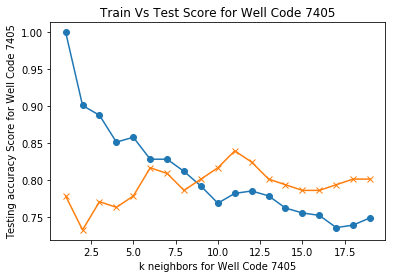

k=3 Test Acc: 0.762
-----------KNN Evaluation Metrics for Well Code 7078-----------------
[[  3   3   1   0   1   0   0   0   0]
 [  4  25   5   0   1   0   0   0   0]
 [  0   1  14   2   3   0   0   0   0]
 [  2   1   4  23  16   1   0   0   0]
 [  2   1   1   3 141   4   0   0   0]
 [  0   0   0   1  20  26   0   0   0]
 [  0   0   0   0   0   0  10   1   0]
 [  0   0   0   0   0   0   1  12   1]
 [  0   0   0   0   0   0   0   0   2]]
              precision    recall  f1-score   support

           1       0.27      0.38      0.32         8
           2       0.81      0.71      0.76        35
           3       0.56      0.70      0.62        20
           4       0.79      0.49      0.61        47
           5       0.77      0.93      0.84       152
           6       0.84      0.55      0.67        47
           7       0.91      0.91      0.91        11
           8       0.92      0.86      0.89        14
           9       0.67      1.00      0.80         2

   micro avg    

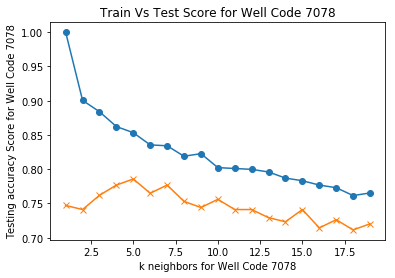

k=3 Test Acc: 0.634
-----------KNN Evaluation Metrics for Well Code 5599-----------------
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  2 101  32   4   0   0   1   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0  39  50  12   1   0   2   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   1   0   0]
 [  1   4   5 165   3   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   1   1  12  43   1   0   0   0   0   0   1   1   2   0   0   0   0
    0   0   0   0   0   0]
 [  1   0   6   2   9  16   6   1   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  2   0   2   0   1   3  27   4   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   2   3   6   1   0   1   0   0   0   0   0   0   0
    0   0   0   2   0   0]
 [  0   0   0   0   0   0   0   2   9   1   1   0   0   0   0   0   0   0
    1   0   0   0   0   0]
 

/Users/wandabaghel/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/wandabaghel/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Well Code 5599, k: 3, Train/Test Score: 0.797/0.634
Well Code 5599, k: 4, Train/Test Score: 0.772/0.648
Well Code 5599, k: 5, Train/Test Score: 0.757/0.647
Well Code 5599, k: 6, Train/Test Score: 0.738/0.644
Well Code 5599, k: 7, Train/Test Score: 0.736/0.647
Well Code 5599, k: 8, Train/Test Score: 0.725/0.649
Well Code 5599, k: 9, Train/Test Score: 0.714/0.645
Well Code 5599, k: 10, Train/Test Score: 0.699/0.636
Well Code 5599, k: 11, Train/Test Score: 0.686/0.628
Well Code 5599, k: 12, Train/Test Score: 0.671/0.618
Well Code 5599, k: 13, Train/Test Score: 0.672/0.615
Well Code 5599, k: 14, Train/Test Score: 0.667/0.619
Well Code 5599, k: 15, Train/Test Score: 0.664/0.606
Well Code 5599, k: 16, Train/Test Score: 0.657/0.599
Well Code 5599, k: 17, Train/Test Score: 0.653/0.600
Well Code 5599, k: 18, Train/Test Score: 0.650/0.595
Well Code 5599, k: 19, Train/Test Score: 0.655/0.591


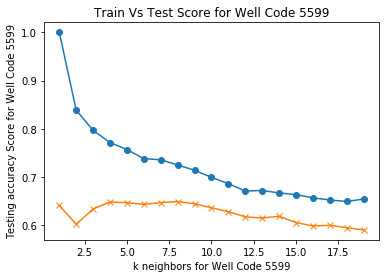

k=3 Test Acc: 0.757
-----------KNN Evaluation Metrics for Well Code 5351-----------------
[[137   6   4   0   1   0   0   0   0   0   0   0   0   1   0   0   0   0
    0   0   0   0]
 [  4  95   5   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  4   4  66   4   0   1   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0   0   3  49   5   0   1   0   0   0   0   0   0   0   0   0   1   0
    0   0   0   0]
 [  0   1   1   2  68   1   0   3   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0   0   1   0   2  14   1   3   1   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0   0   1   0   0   0  31   6   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0   0   0   1   2   1   2  36   1   0   0   0   0   1   0   0   0   0
    1   0   0   0]
 [  0   0   2   0   0   0   1   6  16   4   3   0   0   0   0   0   0   0
    0   0   0   0]
 [  1   0   1   0   0   0   1   3   2  25   3   1   0   0   0   0   0   0

/Users/wandabaghel/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Well Code 5351, k: 3, Train/Test Score: 0.855/0.757
Well Code 5351, k: 4, Train/Test Score: 0.833/0.746
Well Code 5351, k: 5, Train/Test Score: 0.817/0.741
Well Code 5351, k: 6, Train/Test Score: 0.808/0.740
Well Code 5351, k: 7, Train/Test Score: 0.802/0.738
Well Code 5351, k: 8, Train/Test Score: 0.792/0.729
Well Code 5351, k: 9, Train/Test Score: 0.792/0.719
Well Code 5351, k: 10, Train/Test Score: 0.777/0.717
Well Code 5351, k: 11, Train/Test Score: 0.772/0.712
Well Code 5351, k: 12, Train/Test Score: 0.765/0.721
Well Code 5351, k: 13, Train/Test Score: 0.758/0.699
Well Code 5351, k: 14, Train/Test Score: 0.752/0.692
Well Code 5351, k: 15, Train/Test Score: 0.748/0.691
Well Code 5351, k: 16, Train/Test Score: 0.740/0.690
Well Code 5351, k: 17, Train/Test Score: 0.741/0.685
Well Code 5351, k: 18, Train/Test Score: 0.730/0.680
Well Code 5351, k: 19, Train/Test Score: 0.731/0.679


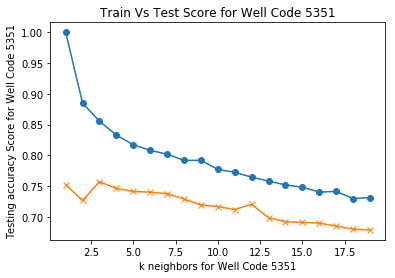

k=3 Test Acc: 0.900
-----------KNN Evaluation Metrics for Well Code 7289-----------------
[[  0   0   0   0]
 [  3 194   6   0]
 [  0  13  14   0]
 [  0   0   1   0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.94      0.96      0.95       203
           2       0.67      0.52      0.58        27
           3       0.00      0.00      0.00         1

   micro avg       0.90      0.90      0.90       231
   macro avg       0.40      0.37      0.38       231
weighted avg       0.90      0.90      0.90       231

--------------------------------------------------------------------
Well Code 7289, k: 1, Train/Test Score: 1.000/0.909
Well Code 7289, k: 2, Train/Test Score: 0.950/0.887
Well Code 7289, k: 3, Train/Test Score: 0.942/0.900
Well Code 7289, k: 4, Train/Test Score: 0.939/0.905
Well Code 7289, k: 5, Train/Test Score: 0.941/0.913
Well Code 7289, k: 6, Train/Test Score: 0.933/0.909
Well Code 7289, k

/Users/wandabaghel/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/wandabaghel/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Well Code 7289, k: 10, Train/Test Score: 0.916/0.913
Well Code 7289, k: 11, Train/Test Score: 0.911/0.918
Well Code 7289, k: 12, Train/Test Score: 0.911/0.913
Well Code 7289, k: 13, Train/Test Score: 0.913/0.913
Well Code 7289, k: 14, Train/Test Score: 0.911/0.913
Well Code 7289, k: 15, Train/Test Score: 0.914/0.913
Well Code 7289, k: 16, Train/Test Score: 0.913/0.905
Well Code 7289, k: 17, Train/Test Score: 0.907/0.900
Well Code 7289, k: 18, Train/Test Score: 0.909/0.900
Well Code 7289, k: 19, Train/Test Score: 0.909/0.892


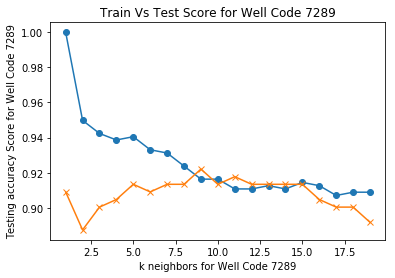

k=3 Test Acc: 0.973
-----------KNN Evaluation Metrics for Well Code 5769-----------------
[[ 0  1]
 [ 0 36]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.97      1.00      0.99        36

   micro avg       0.97      0.97      0.97        37
   macro avg       0.49      0.50      0.49        37
weighted avg       0.95      0.97      0.96        37

--------------------------------------------------------------------
Well Code 5769, k: 1, Train/Test Score: 1.000/0.973
Well Code 5769, k: 2, Train/Test Score: 0.976/0.946
Well Code 5769, k: 3, Train/Test Score: 0.976/0.973
Well Code 5769, k: 4, Train/Test Score: 0.976/1.000
Well Code 5769, k: 5, Train/Test Score: 0.976/0.973
Well Code 5769, k: 6, Train/Test Score: 0.976/0.973
Well Code 5769, k: 7, Train/Test Score: 0.976/0.973
Well Code 5769, k: 8, Train/Test Score: 0.976/0.973
Well Code 5769, k: 9, Train/Test Score: 0.976/0.973
Well Code 5769, k: 10, Trai

/Users/wandabaghel/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


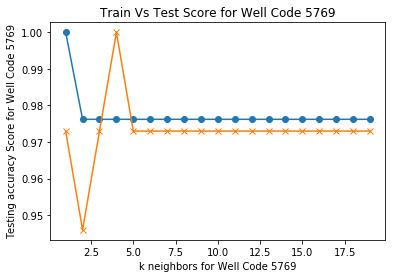

In [273]:
for i in well_code:
    data_well = well_data1[['AVG_WHT_P','AVG_WHP_P','DP_Choke_Size','AVG_DOWNHOLE_PRESSURE',
       'AVG_DOWNHOLE_TEMPERATURE','BORE_OIL_VOL','BORE_OIL_LABEL']][well_data1['NPD_WELL_BORE_CODE'] == i]
    
    X = data_well[['AVG_WHT_P','AVG_WHP_P','DP_Choke_Size','AVG_DOWNHOLE_PRESSURE','AVG_DOWNHOLE_TEMPERATURE']]
    y = data_well['BORE_OIL_LABEL']
    
    #y = y.values.reshape(-1,1)
    
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state = 42)
    
    X_scaler = StandardScaler().fit(X_train)
    X_train_scaled = X_scaler.transform(X_train)
    X_test_scaled = X_scaler.transform(X_test)
    
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train_scaled, y_train)
    print('k=3 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))
    
    y_pred = knn.predict(X_test_scaled)
    
    ## Evaluation Metrics for KNN Classifier
    print(f"-----------KNN Evaluation Metrics for Well Code {i}-----------------")
    print(confusion_matrix(y_test, y_pred))  
    print(classification_report(y_test, y_pred))
    print(f"--------------------------------------------------------------------")
    
    train_scores = []
    test_scores = []

    for k in range(1, 20, 1):
        # create the classifier for each value of K
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train_scaled, y_train)

        #Score with both test and train data
        train_score = knn.score(X_train_scaled, y_train)
        test_score = knn.score(X_test_scaled, y_test)

        #append the scores to our list of scores
        train_scores.append(train_score)
        test_scores.append(test_score)
        print(f"Well Code {i}, k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    

    plt.plot(range(1, 20, 1), train_scores, marker='o')
    plt.plot(range(1, 20, 1), test_scores, marker="x")
    plt.xlabel(f"k neighbors for Well Code {i}")
    plt.ylabel(f"Testing accuracy Score for Well Code {i}")
    plt.title(f"Train Vs Test Score for Well Code {i}")
    
    plt.savefig(f"Train Vs Test Score For Well Code {i}")
    plt.show()
    
    
#     rf = RandomForestClassifier(random_state=42)
#     rf = rf.fit(X_train, y_train)
    
#     print(f"For Well Bore Code {i}:")
#     print(f"Train Score: {rf.score(X_train, y_train)}")
#     print(f"Test Score: {rf.score(X_test, y_test)}")
    
#     features = X.columns
#     print(f"Column Importance: {sorted(zip(rf.feature_importances_, features), reverse=True)}")
#     print("-----------------------------------------------------------------------------------------")


## Calculate the mean square error between Test and Perdiction values using KNN model.

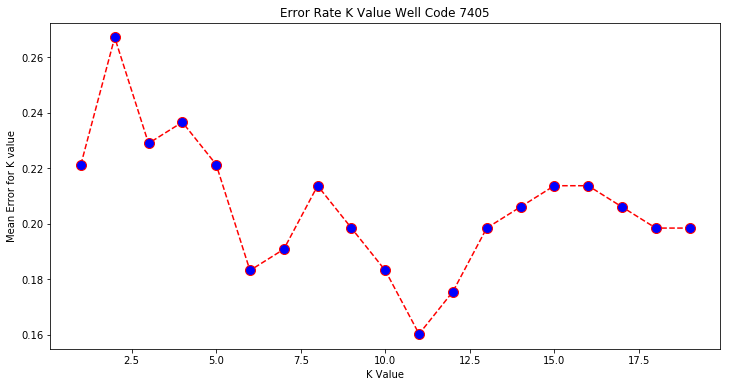

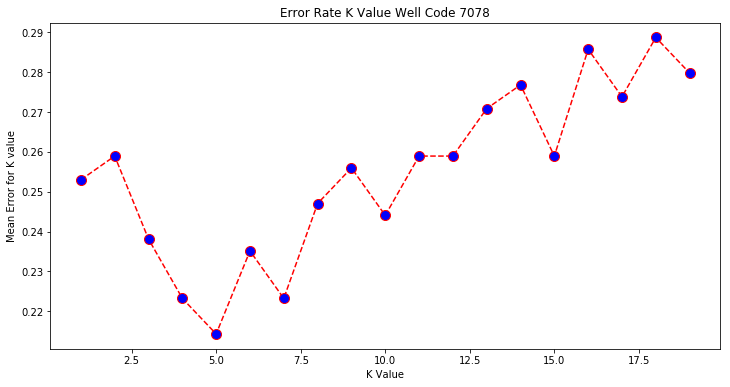

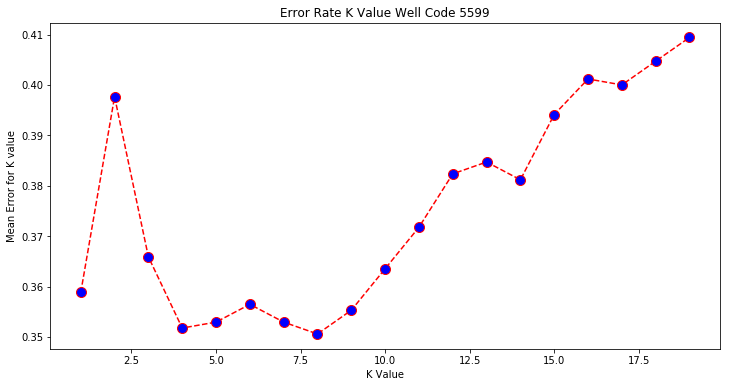

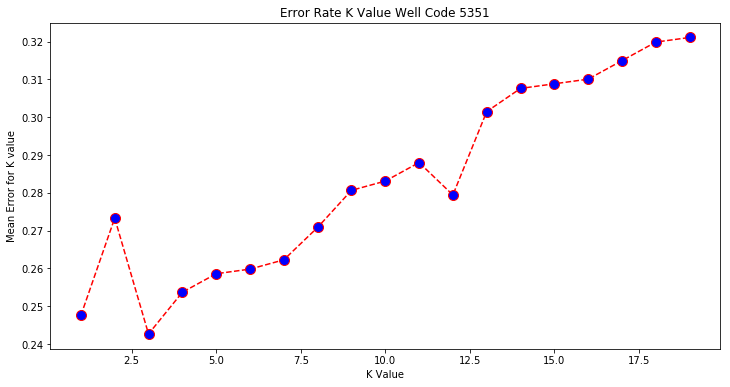

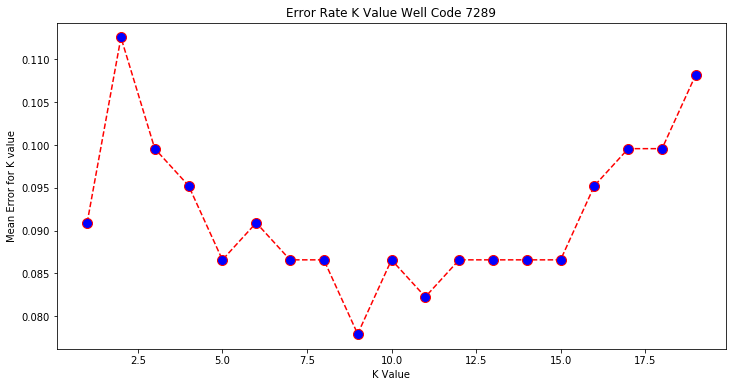

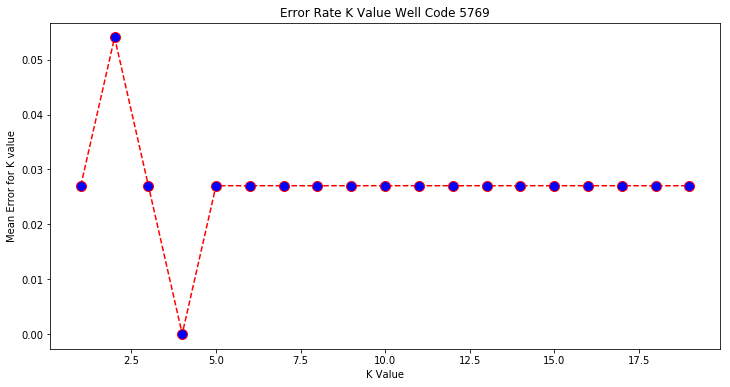

In [274]:
# Error Rate For K Values
for i in well_code:
    data_well = well_data1[['AVG_WHT_P','AVG_WHP_P','DP_Choke_Size','AVG_DOWNHOLE_PRESSURE',
       'AVG_DOWNHOLE_TEMPERATURE','BORE_OIL_VOL','BORE_OIL_LABEL']][well_data1['NPD_WELL_BORE_CODE'] == i]
    
    X = data_well[['AVG_WHT_P','AVG_WHP_P','DP_Choke_Size','AVG_DOWNHOLE_PRESSURE','AVG_DOWNHOLE_TEMPERATURE']]
    y = data_well['BORE_OIL_LABEL']
    
    #y = y.values.reshape(-1,1)
    
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state = 42)
    
    X_scaler = StandardScaler().fit(X_train)
    X_train_scaled = X_scaler.transform(X_train)
    X_test_scaled = X_scaler.transform(X_test)
    
    error = []

    # Calculating error for K values between 1 and 20
    for k in range(1, 20):  
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train_scaled, y_train)
        pred_k = knn.predict(X_test_scaled)
        error.append(np.mean(pred_k != y_test))

    plt.figure(figsize=(12, 6))  
    plt.plot(range(1, 20), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
    plt.title(f"Error Rate K Value Well Code {i}")  
    plt.xlabel(f"K Value")  
    plt.ylabel(f"Mean Error for K value")
    plt.savefig(f"Error Plot K Value Well Code{i}")

##### The error plot for each well indicates that the KNN model may stabilized for higher values of K. Also the error value  is not consistent. 

## Next apply the KNN model on the whole Dataset. Calculate error and mean square error between Test and Prediction.

k=3 Test Acc: 0.726
-----------KNN Evaluation Metrics for Well Code 5769-----------------
[[  0   4   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0 448  67   7   2   1   2   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0  61 294  26   4   3   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0  11  22 244  13   3   1   0   0   0   1   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   8   9   9 102  16   0   0   0   0   0   0   0   0   0   1   0   0
    0   0   0   0   0   0]
 [  1   4   3   5  13 222  19   2   1   0   0   1   1   0   0   0   0   0
    0   0   0   0   0   0]
 [  1   0   2   2   5  13  64   6   4   2   0   1   0   1   0   1   0   0
    0   0   0   0   0   0]
 [  0   0   0   1   2   5   6  50   7   0   0   1   0   0   0   0   0   0
    0   0   1   0   0   0]
 [  0   0   0   0   0   0   1  10  70   6   2   1   1   1   0   0   0   0
    0   0   0   0   0   0]
 

/Users/wandabaghel/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


k: 1, Train/Test Score: 1.000/0.729
k: 2, Train/Test Score: 0.871/0.708
k: 3, Train/Test Score: 0.843/0.726
k: 4, Train/Test Score: 0.823/0.729
k: 5, Train/Test Score: 0.809/0.730
k: 6, Train/Test Score: 0.792/0.728
k: 7, Train/Test Score: 0.787/0.723
k: 8, Train/Test Score: 0.775/0.720
k: 9, Train/Test Score: 0.768/0.716
k: 10, Train/Test Score: 0.760/0.714
k: 11, Train/Test Score: 0.751/0.709
k: 12, Train/Test Score: 0.750/0.707
k: 13, Train/Test Score: 0.742/0.702
k: 14, Train/Test Score: 0.736/0.702
k: 15, Train/Test Score: 0.732/0.700
k: 16, Train/Test Score: 0.731/0.690
k: 17, Train/Test Score: 0.728/0.684
k: 18, Train/Test Score: 0.725/0.685
k: 19, Train/Test Score: 0.720/0.685
k: 20, Train/Test Score: 0.714/0.682
k: 21, Train/Test Score: 0.714/0.684
k: 22, Train/Test Score: 0.711/0.676
k: 23, Train/Test Score: 0.710/0.679
k: 24, Train/Test Score: 0.706/0.674
k: 25, Train/Test Score: 0.706/0.674
k: 26, Train/Test Score: 0.703/0.673
k: 27, Train/Test Score: 0.702/0.671
k: 28, Tra

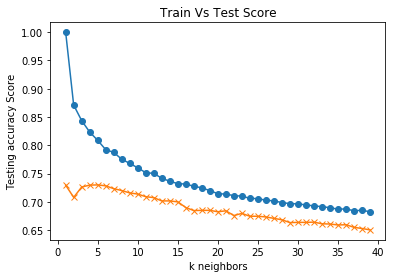

In [275]:
## Plots for Cumulative Data

data_well_all = well_data1[['AVG_WHT_P','AVG_WHP_P','DP_Choke_Size','AVG_DOWNHOLE_PRESSURE',
   'AVG_DOWNHOLE_TEMPERATURE','BORE_OIL_VOL','BORE_OIL_LABEL']]

X = data_well_all[['AVG_WHT_P','AVG_WHP_P','DP_Choke_Size','AVG_DOWNHOLE_PRESSURE','AVG_DOWNHOLE_TEMPERATURE']]
y = data_well_all['BORE_OIL_LABEL']

#y = y.values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state = 42)

X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)
print('k=3 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

y_pred = knn.predict(X_test_scaled)

## Evaluation Metrics for KNN Classifier
print(f"-----------KNN Evaluation Metrics for Well Code {i}-----------------")
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))
print(f"--------------------------------------------------------------------")

train_scores = []
test_scores = []

for k in range(1, 40, 1):
    # create the classifier for each value of K
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)

    #Score with both test and train data
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)

    #append the scores to our list of scores
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")


plt.plot(range(1, 40, 1), train_scores, marker='o')
plt.plot(range(1, 40, 1), test_scores, marker="x")
plt.xlabel(f"k neighbors")
plt.ylabel(f"Testing accuracy Score")
plt.title(f"Train Vs Test Score")
#plt.show()
plt.savefig(f"Train Vs Test Score for all Wells")
plt.show()

##### The KNN model on the full dataset seems to be stabilize from K=17 onwards.

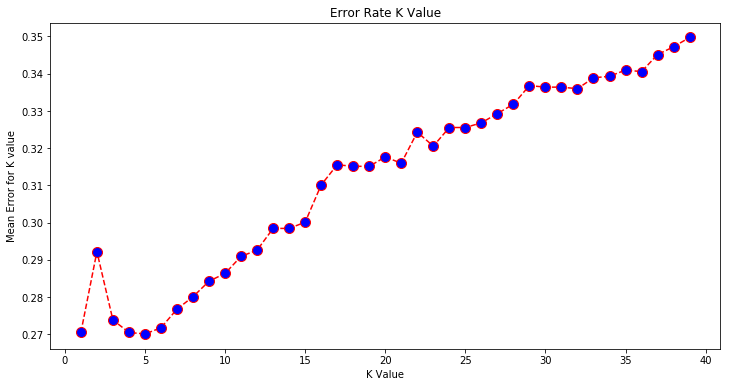

In [276]:
error = []
prediction = []

# Calculating error for K values between 1 and 20
for k in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    pred_k = knn.predict(X_test_scaled)
    error.append(np.mean(pred_k != y_test))

plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
     markerfacecolor='blue', markersize=10)
plt.title(f"Error Rate K Value")  
plt.xlabel(f"K Value")  
plt.ylabel(f"Mean Error for K value")
plt.savefig(f"Error Plot K Value all Wells")

##### Error do not seems to stabilize.

## Plot the Error Plot between Prediction Category and Prodcution Volume. 
### The Error is the difference between mean production volume and min prediction volume for a given category.

In [277]:
## Actual Versus Predictions
prediction
#print(data_well_all['BORE_OIL_VOL'].to_list())
#data_well_all['BORE_OIL_VOL'][5488]

''' Map the predicted category to Oil volume from test data. '''

out_df = []

for j in y_test.index:
    out_df.append(data_well_all['BORE_OIL_VOL'][j])

#out_df

In [278]:
# Create a DataFrame for Actual and Prediction values.

pred_df = pd.DataFrame({'Bore_Oil_Volume':out_df,'Actual':y_test,'Prediction':pred_k})

In [279]:
pred_df.head()

,Bore_Oil_Volume,Actual,Prediction
5488,1128,5,7
2577,1508,7,6
3692,185,1,1
7465,157,1,1
7563,123,1,1


In [280]:
# Create new columns Min Production and Max Production.
# The Max Prediction is a product of Predict category and 250. 
# The Min Prediction is Max Prediction - 250.

pred_df['Min Prediction'] = (pred_df['Prediction'] * 250) - 250
pred_df['Max Prediction'] = (pred_df['Prediction'] * 250)
pred_df.head()

,Bore_Oil_Volume,Actual,Prediction,Min Prediction,Max Prediction
5488,1128,5,7,1500,1750
2577,1508,7,6,1250,1500
3692,185,1,1,0,250
7465,157,1,1,0,250
7563,123,1,1,0,250


In [281]:
# Group By the DataFrame using Prediction column and calculate mean.

predgroup_df = pred_df.groupby(['Prediction'], as_index=False).mean()
predgroup_df.head(50)

,Prediction,Bore_Oil_Volume,Actual,Min Prediction,Max Prediction
0,1,195.886756,1.170825,0.0,250.0
1,2,354.423077,1.961538,250.0,500.0
2,3,603.043636,2.876364,500.0,750.0
3,4,909.891473,4.147287,750.0,1000.0
4,5,1089.584795,4.833333,1000.0,1250.0
5,6,1291.281250,5.687500,1250.0,1500.0
6,7,1710.333333,7.333333,1500.0,1750.0
7,8,1919.074627,8.171642,1750.0,2000.0
8,9,2102.500000,9.000000,2000.0,2250.0
9,10,2195.184211,9.394737,2250.0,2500.0


### Plot the Error Plot between Prediction and Min Prediction 

<function matplotlib.pyplot.show(*args, **kw)>

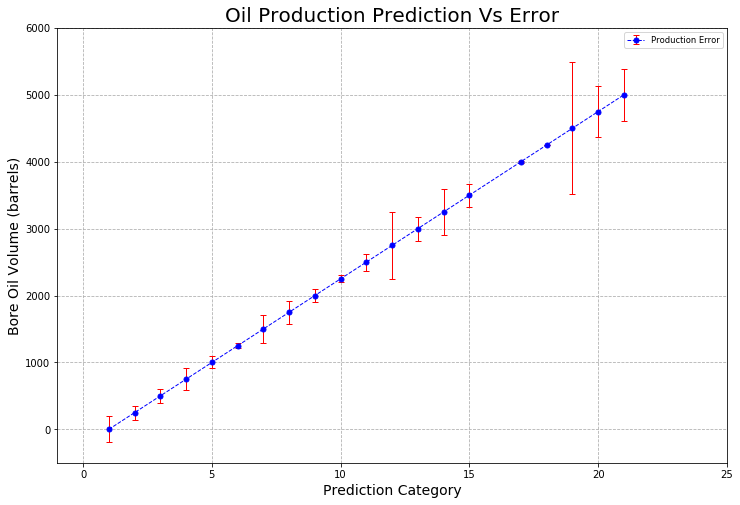

In [282]:
yerror = predgroup_df['Min Prediction'] - predgroup_df['Bore_Oil_Volume']
plt.figure(figsize=(12,8))
plt.errorbar(predgroup_df['Prediction'], predgroup_df['Min Prediction'], yerr=yerror, marker='o', markersize=5,
                label='Production Error',color='b',ecolor='r',linestyle='dashed',linewidth=1.0,capsize=3)

plt.xlim(-1,25,1)
plt.ylim(-500,6000)
plt.grid(linestyle='dashed')
plt.xlabel('Prediction Category', fontsize=14)
plt.ylabel('Bore Oil Volume (barrels)', fontsize=14)
plt.title('Oil Production Prediction Vs Error', fontsize=20)
plt.legend(loc='best', fontsize='small', fancybox=True)

plt.savefig('PredictionVsError.png')

plt.show

<function matplotlib.pyplot.show(*args, **kw)>

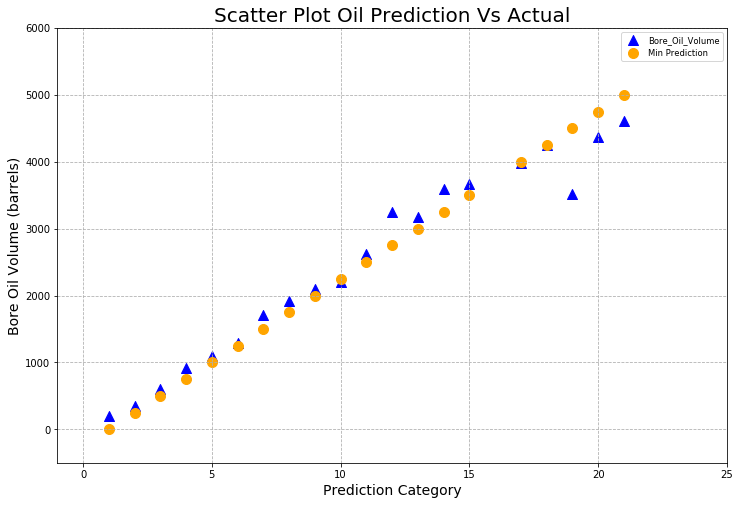

In [283]:
# Scatter Plot.

plt.figure(figsize=(12,8))
plt.scatter(predgroup_df['Prediction'],predgroup_df['Bore_Oil_Volume'], s=100,c='blue',alpha=1, marker='^')
plt.scatter(predgroup_df['Prediction'],predgroup_df['Min Prediction'], s=100,c='orange',alpha=1, marker='o')

plt.xlim(-1,25,1)
plt.ylim(-500,6000)
plt.grid(linestyle='dashed')
plt.xlabel('Prediction Category', fontsize=14)
plt.ylabel('Bore Oil Volume (barrels)', fontsize=14)
plt.title('Scatter Plot Oil Prediction Vs Actual', fontsize=20)
plt.legend(loc='best', fontsize='small', fancybox=True)

plt.savefig('PredictionVsActual.png')

plt.show

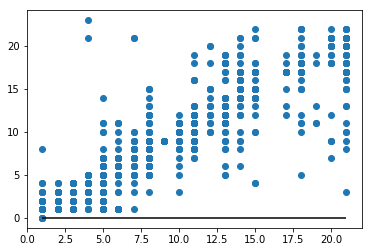

In [284]:
plt.scatter(pred_k, y_test)
plt.hlines(y=0, xmin=pred_k.min(), xmax=pred_k.max())
plt.show()

## Plotting KNN Cluster Regions.

In [285]:
%matplotlib inline

import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from sklearn import datasets

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score, train_test_split

from mlxtend.plotting import plot_learning_curves
from mlxtend.plotting import plot_decision_regions

from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC

In [286]:
X = well_data1[['AVG_WHT_P','AVG_WHP_P','DP_Choke_Size']]
y = well_data1['BORE_OIL_LABEL']
#print(X)
X = X.values
y = y.values

In [287]:
svm = SVC(gamma='auto')
svm.fit(X, y)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [288]:
clf2 = KNeighborsClassifier(n_neighbors=3)
clf2.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [289]:
# Decision region for feature 3 = 1.5
value = 24
# Plot training sample with feature 3 = 1.5 +/- 0.75
width = 1.25

#print(X)
#X = X.values
print(X)
#y = y.values

[[60.757 99.187 70.627]
 [63.047 94.601 66.049]
 [64.547 89.988 61.405]
 ...
 [56.249 23.703  0.168]
 [57.884 23.642  0.102]
 [55.872 23.97   0.42 ]]


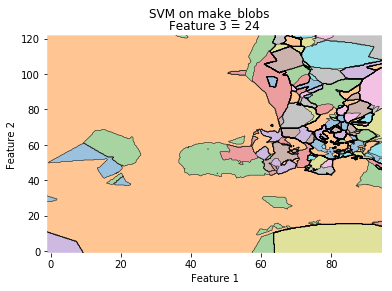

<Figure size 864x576 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [290]:
fig, ax = plt.subplots()

#X = X.values.reshape(-1,1)

# plot_decision_regions(X, y, clf=svm,
#                       filler_feature_values={2: value, 3: value, 4: value},
#                       filler_feature_ranges={2: width, 3: width, 4: width},
#                       legend=4, ax=ax)
plot_decision_regions(X, y, clf=clf2, filler_feature_values={2: value}, legend=24, ax=ax)

plt.figure(figsize=(12,8))
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_title('Feature 3 = {}'.format(value))

# Adding axes annotations
fig.suptitle('SVM on make_blobs')
plt.show()
plt.savefig("KNN Distribution 24 Segments")

In [ ]:
# from sklearn.metrics import mean_squared_error

# predictions = model.predict(X_test_scaled)
# MSE = mean_squared_error(y_test_scaled, predictions)
# r2 = model.score(X_test_scaled, y_test_scaled)

# print(f"MSE: {MSE}, R2: {r2}")